In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
# import csv dataset
df = pd.read_csv('hospital_readmissions.csv')
df.head(5) #Show top 5 data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# Data Preprocessing Part 1

In [ ]:
df.select_dtypes(include='object').nunique()

age                  6
medical_specialty    7
diag_1               8
diag_2               8
diag_3               8
glucose_test         3
A1Ctest              3
change               2
diabetes_med         2
readmitted           2
dtype: int64

# Exploratory Data Analysis

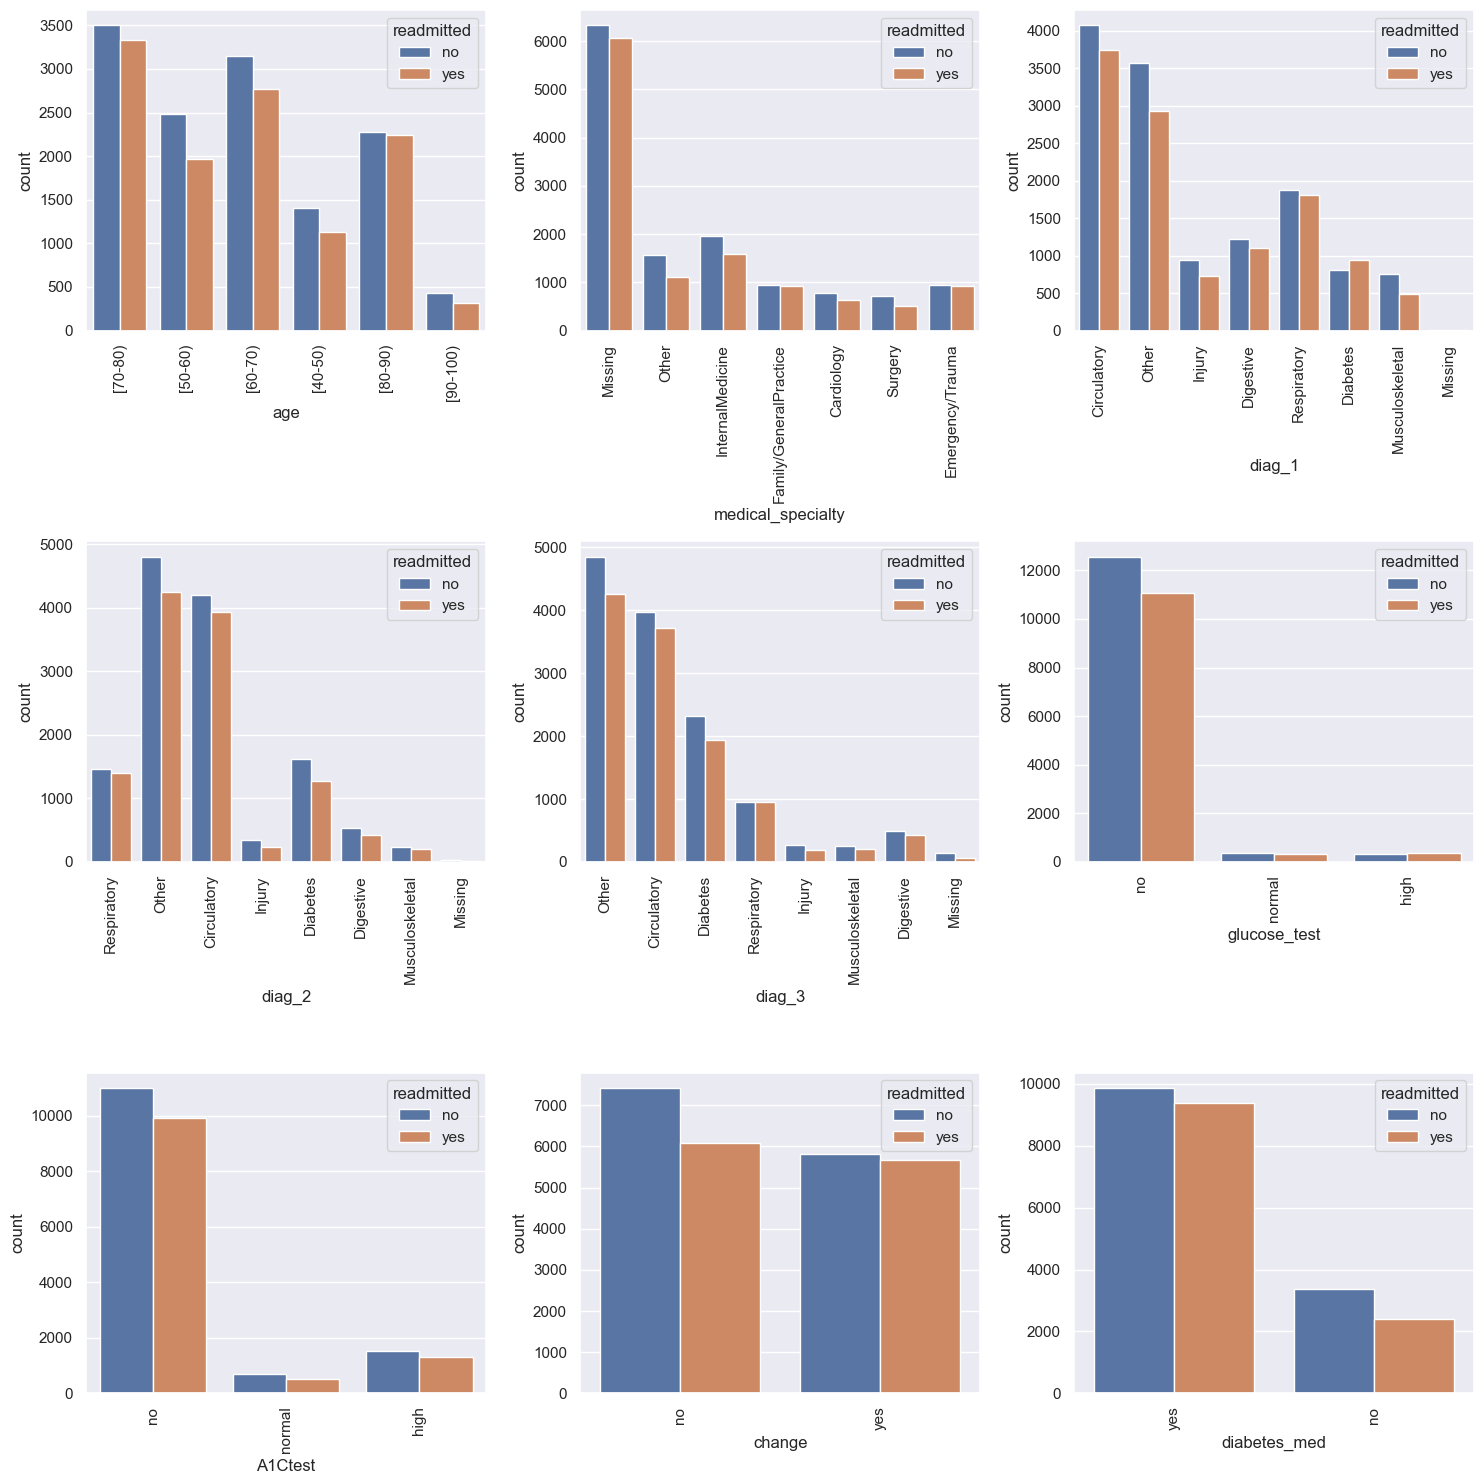

In [ ]:
# list of categorical variables to plot
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
           'A1Ctest', 'change', 'diabetes_med']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

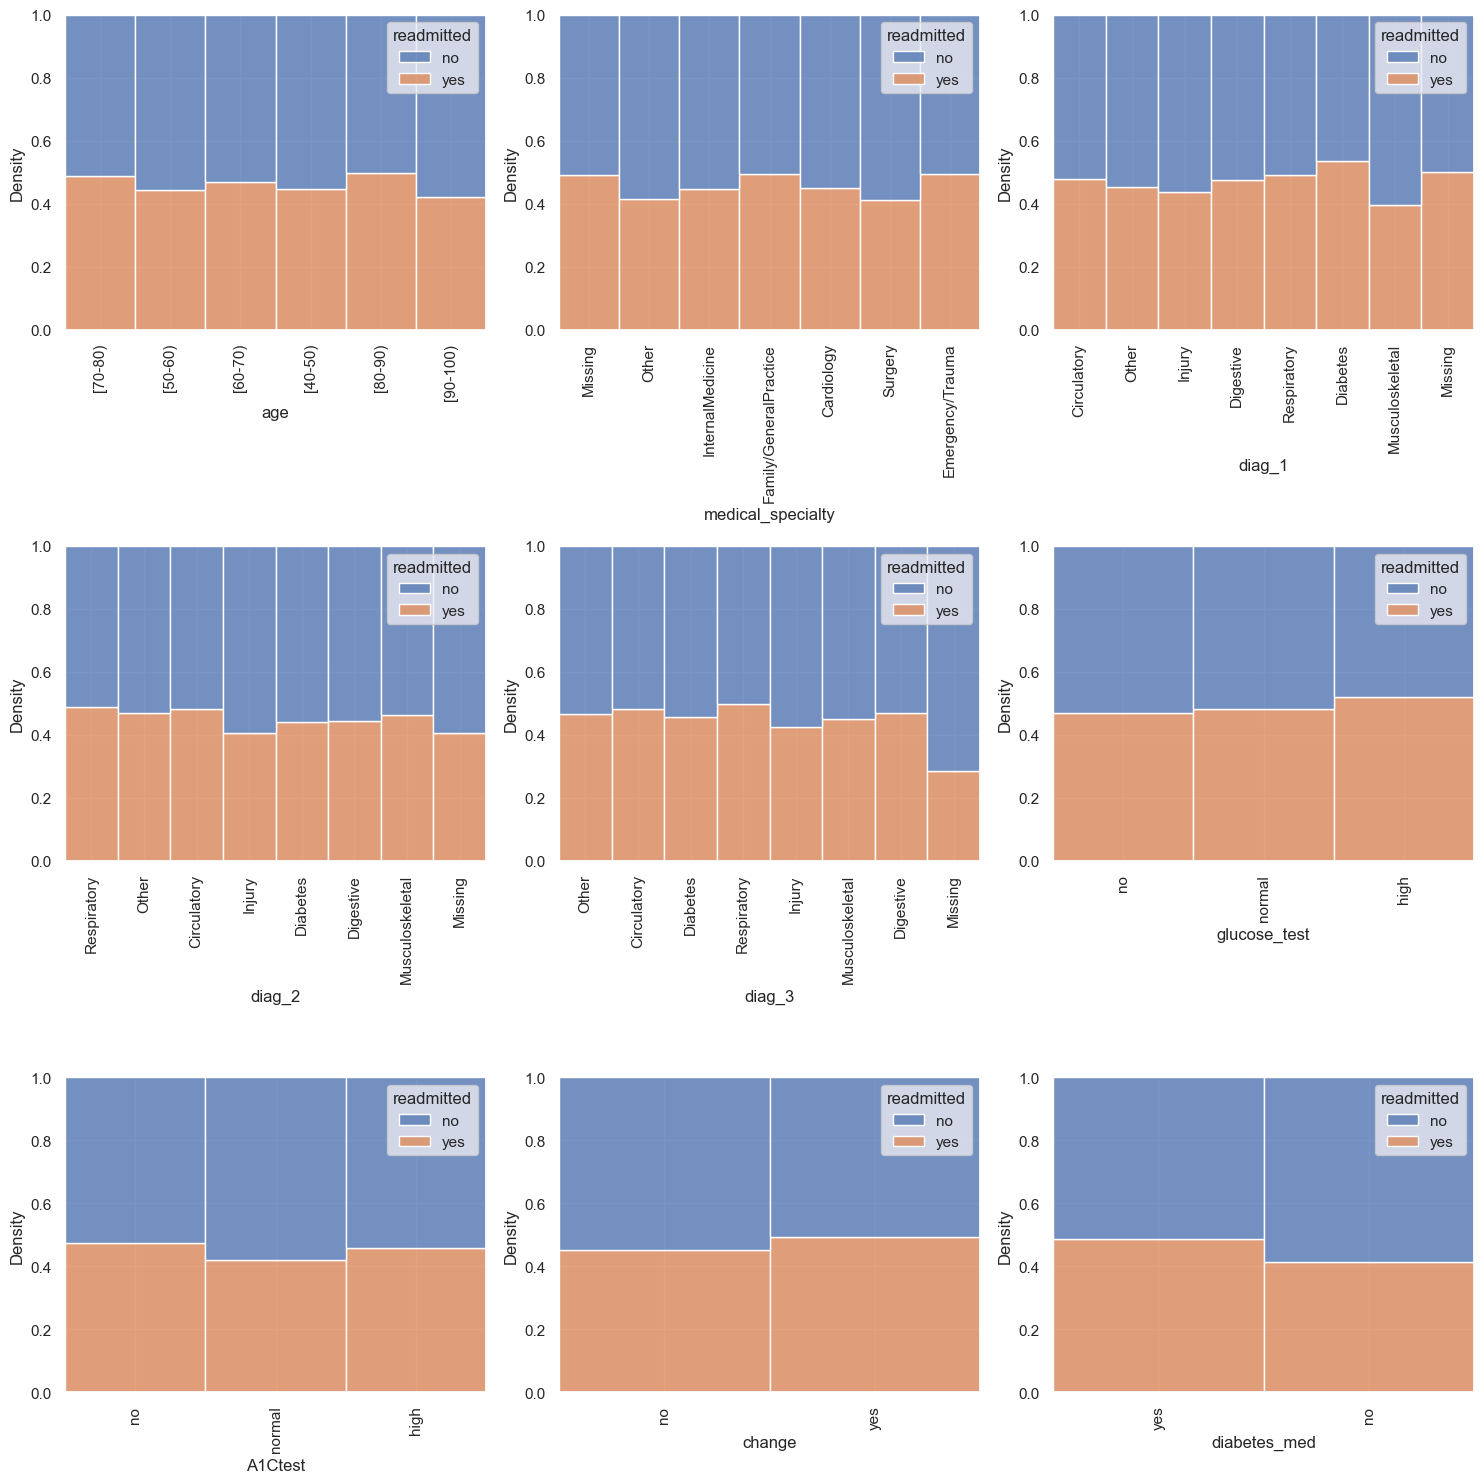

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
           'A1Ctest', 'change', 'diabetes_med']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='readmitted', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

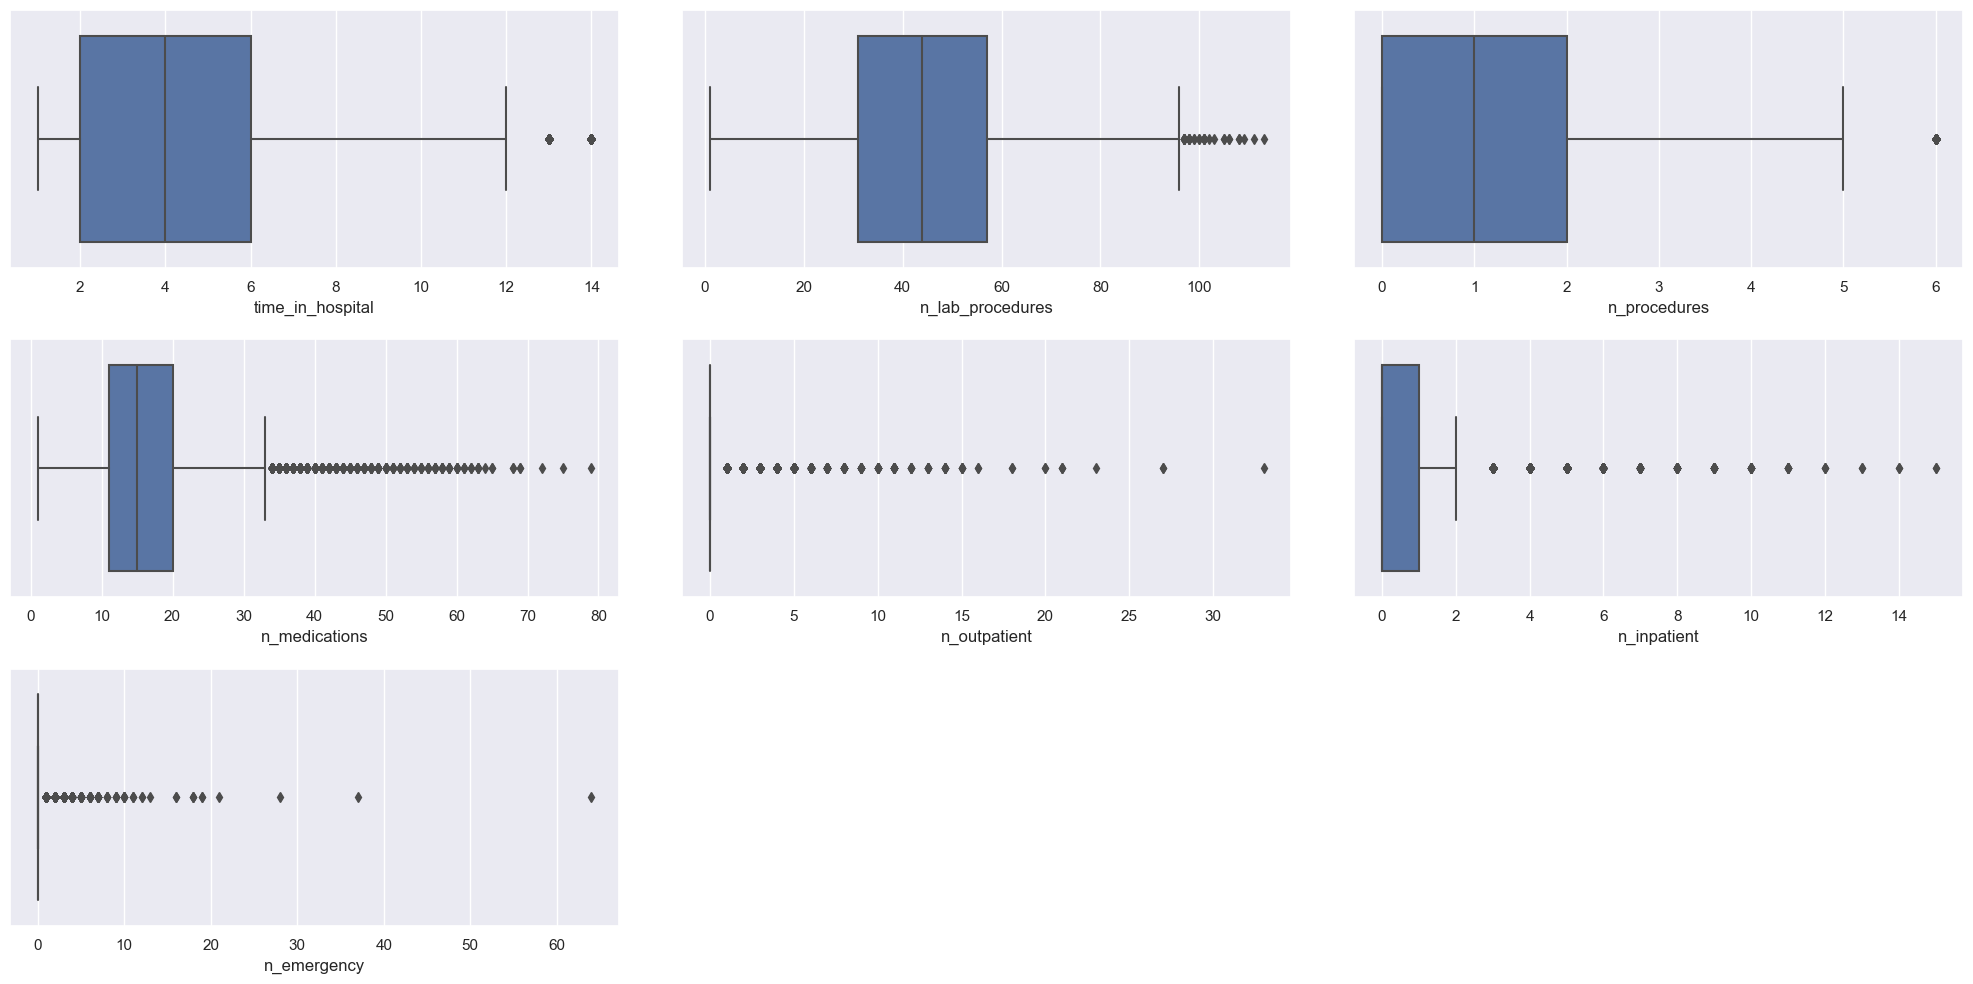

In [ ]:
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
            'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

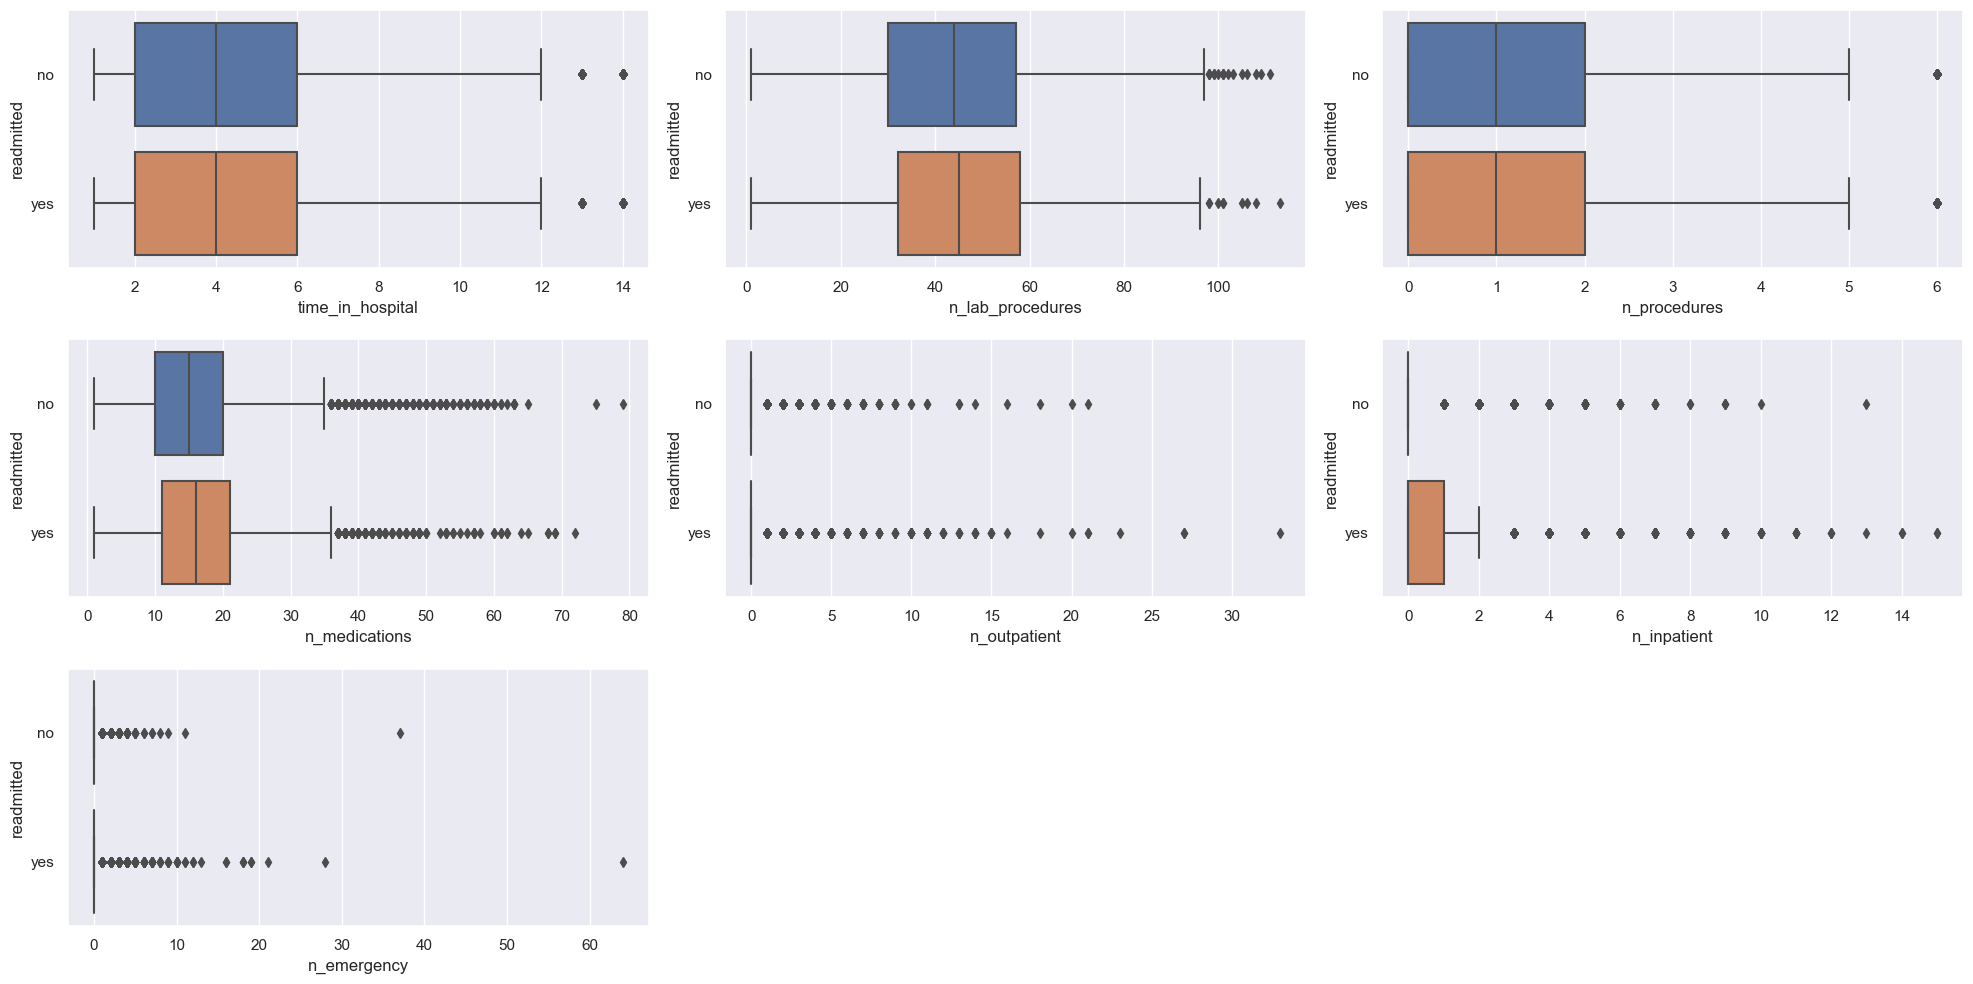

In [ ]:
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
            'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, y='readmitted', ax=axs[i])

fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

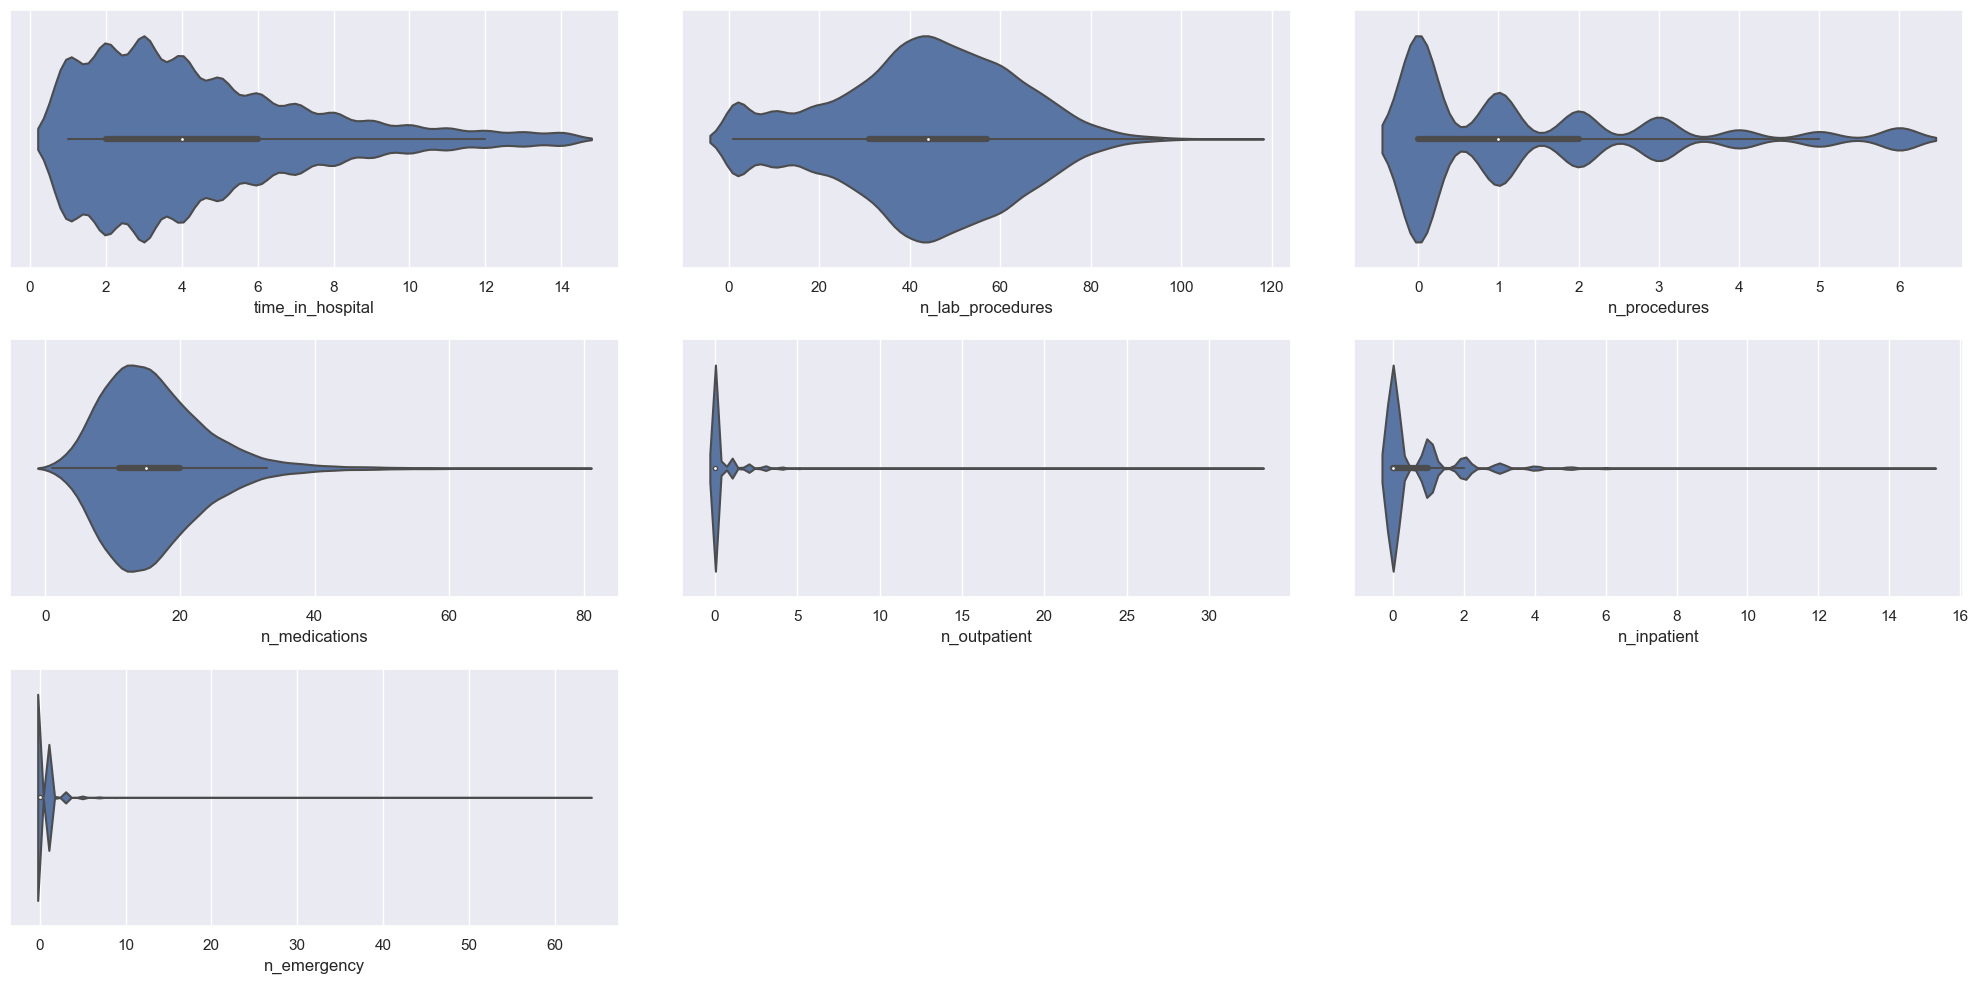

In [ ]:
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
            'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

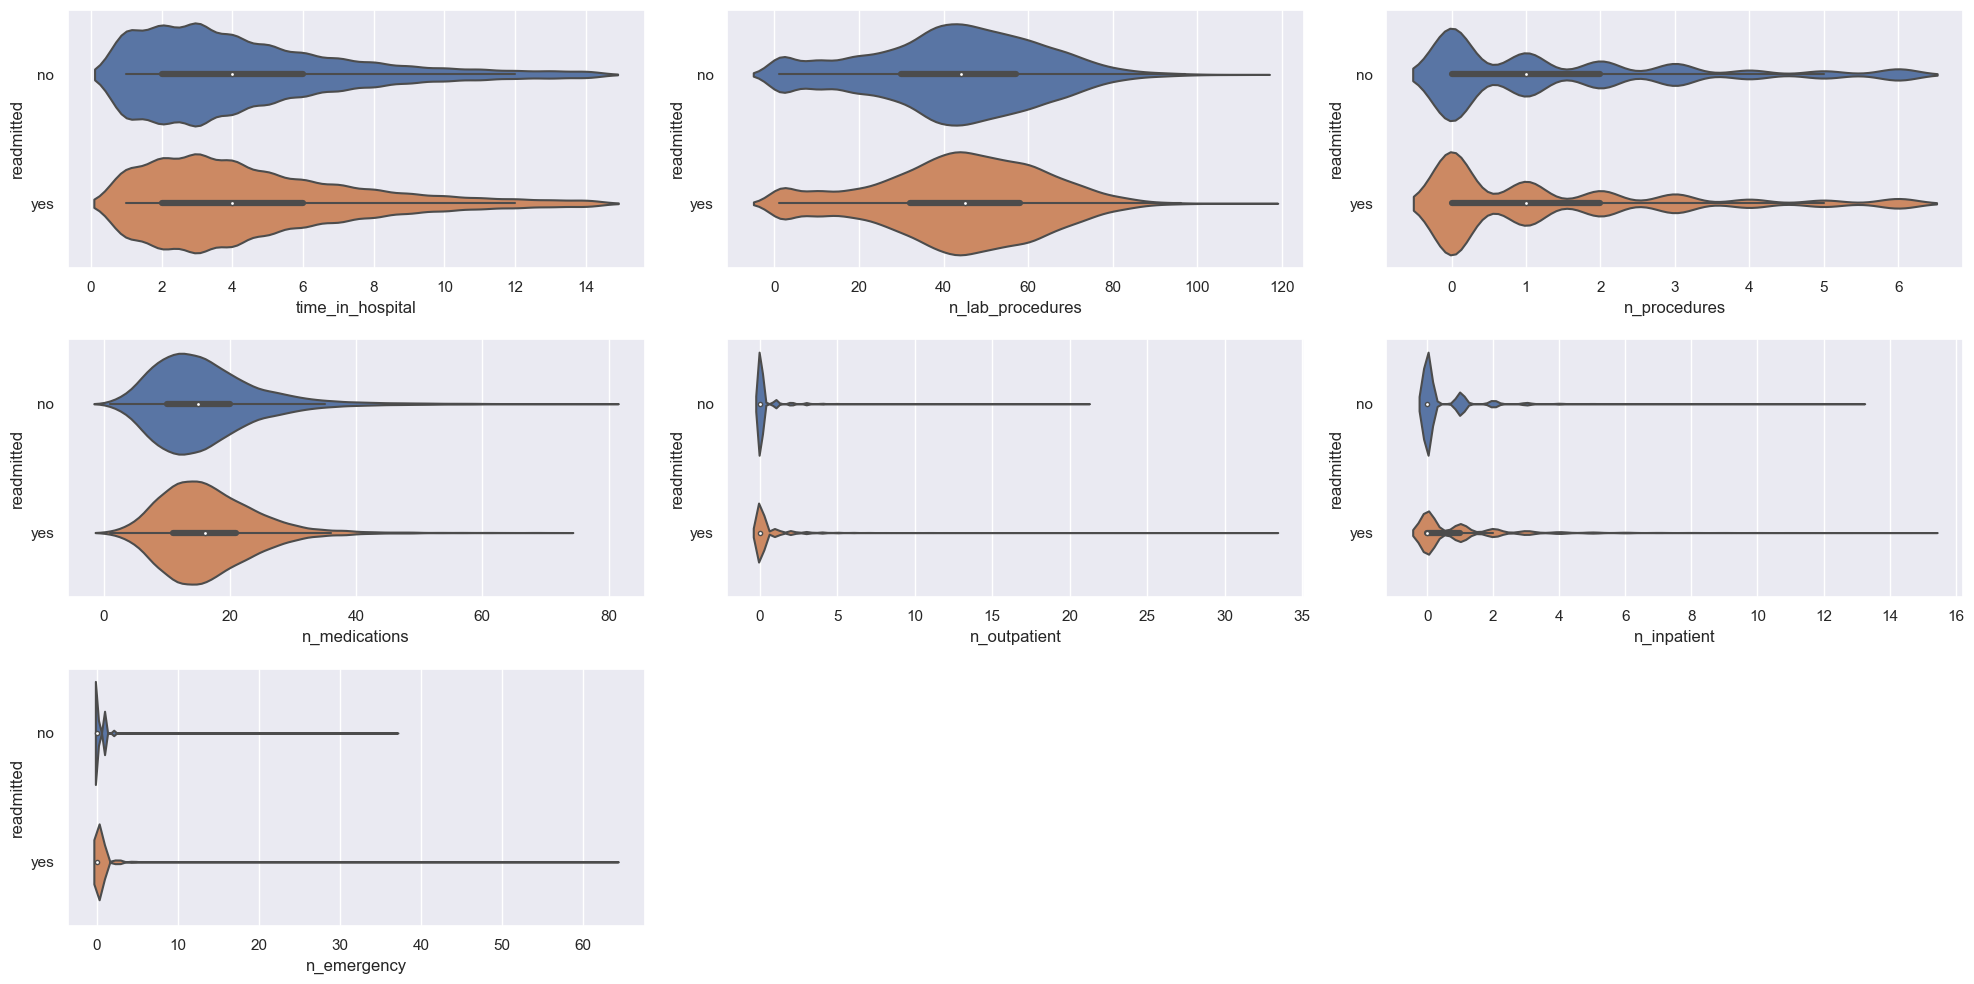

In [ ]:
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
            'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, y='readmitted', ax=axs[i])

fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

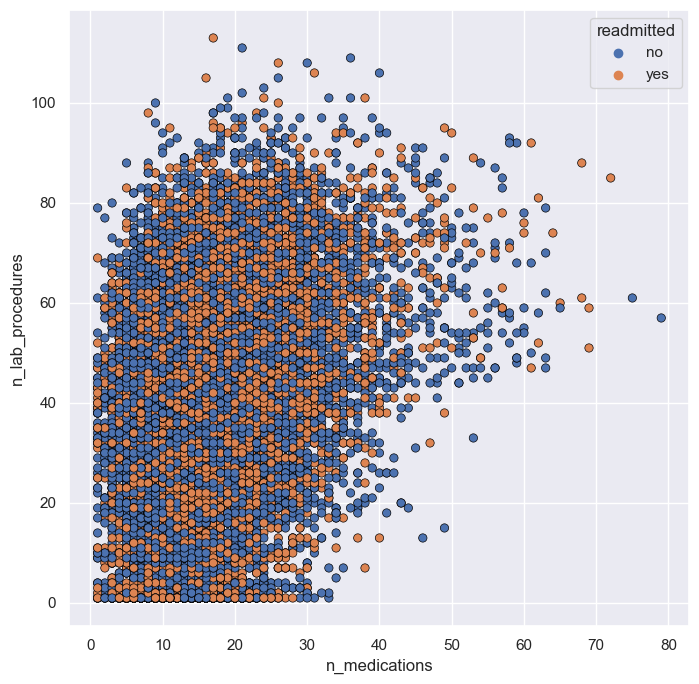

In [ ]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x="n_medications", y="n_lab_procedures", hue="readmitted", data=df, edgecolor="black")
plt.show()

# Exploratory Data Analysis Part 2

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
df.shape

(25000, 17)

# Label Encoding for Object Datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

age: ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
medical_specialty: ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1: ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2: ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3: ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
glucose_test: ['no' 'normal' 'high']
A1Ctest: ['no' 'normal' 'high']
change: ['no' 'yes']
diabetes_med: ['yes' 'no']
readmitted: ['no' 'yes']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

age: [3 1 2 0 4 5]
medical_specialty: [4 5 3 2 0 6 1]
diag_1: [0 6 3 2 7 1 5 4]
diag_2: [7 6 0 3 1 2 5 4]
diag_3: [6 0 1 7 3 5 2 4]
glucose_test: [1 2 0]
A1Ctest: [1 2 0]
change: [0 1]
diabetes_med: [1 0]
readmitted: [0 1]


# Remove Outliers using IQR Method because the outlier is extreme

In [ ]:
# Print the number of rows before outliers removal
df.shape

(25000, 17)

In [ ]:
# define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# specify the columns to remove outliers from
columns_to_check = [ 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# call the function to remove outliers using IQR
df_clean = remove_outliers_iqr(df, columns_to_check)

# print the resulting dataframe
df_clean.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0
5,0,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0,1
6,1,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1,0


In [ ]:
df_clean.shape

(17629, 17)

<AxesSubplot:>

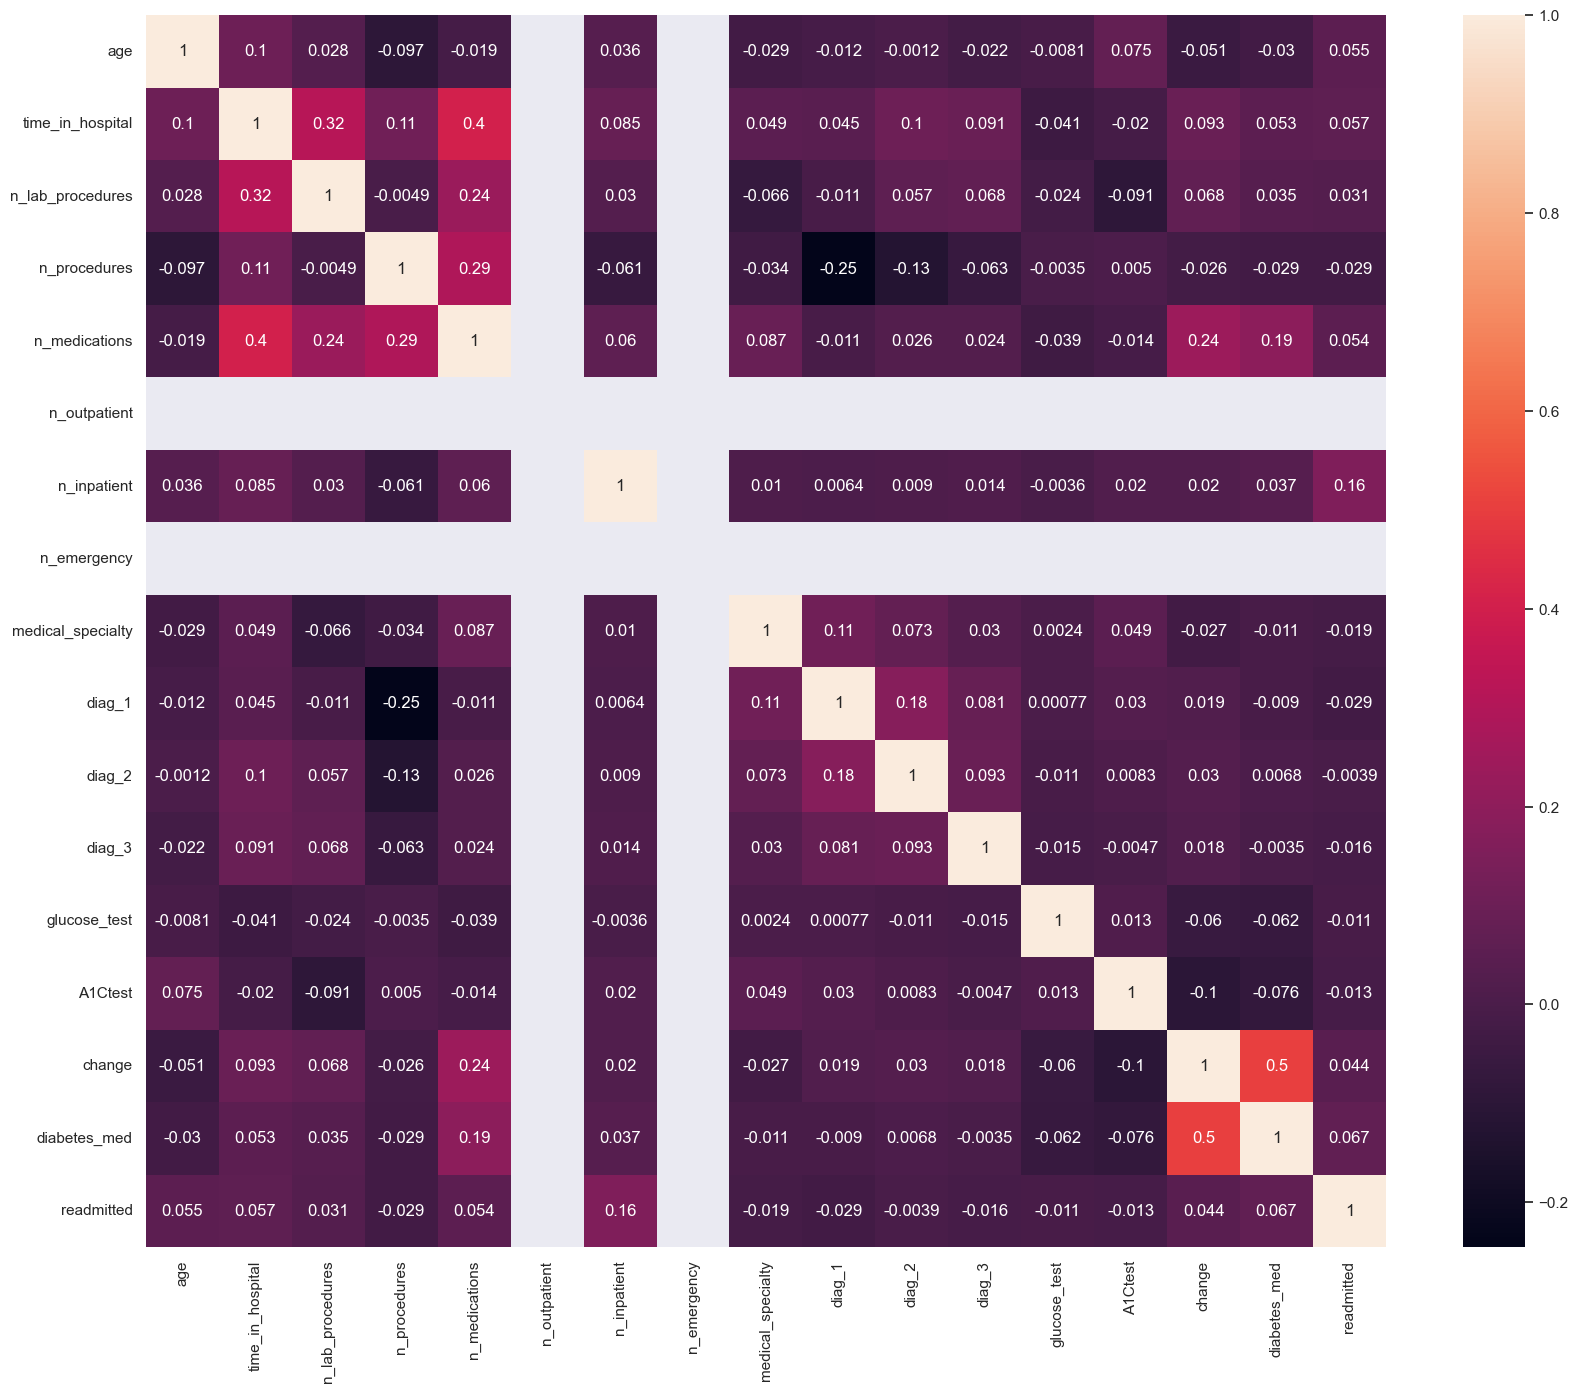

In [ ]:
# Heatmap Correlation
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

In [ ]:
df_clean.dtypes

age                  int32
time_in_hospital     int64
n_lab_procedures     int64
n_procedures         int64
n_medications        int64
n_outpatient         int64
n_inpatient          int64
n_emergency          int64
medical_specialty    int32
diag_1               int32
diag_2               int32
diag_3               int32
glucose_test         int32
A1Ctest              int32
change               int32
diabetes_med         int32
readmitted           int32
dtype: object

In [ ]:
df_clean.drop(columns=['n_outpatient', 'n_emergency'], inplace=True)
df_clean.shape

(17629, 15)

# Train Test Split

In [ ]:
X = df_clean.drop('readmitted', axis=1)
y = df_clean['readmitted']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=1, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=3, random_state=42)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 56.61 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.5660805445263755
Precision Score :  0.5660805445263755
Recall Score :  0.5660805445263755
Jaccard Score :  0.3947784810126582
Log Loss :  14.987253861902914


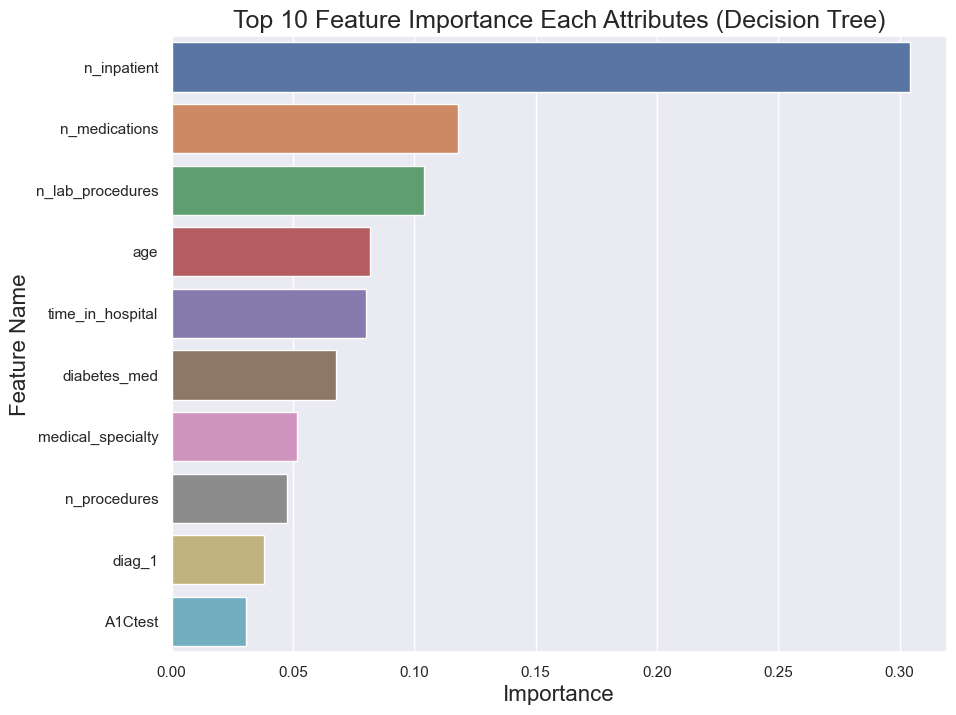

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

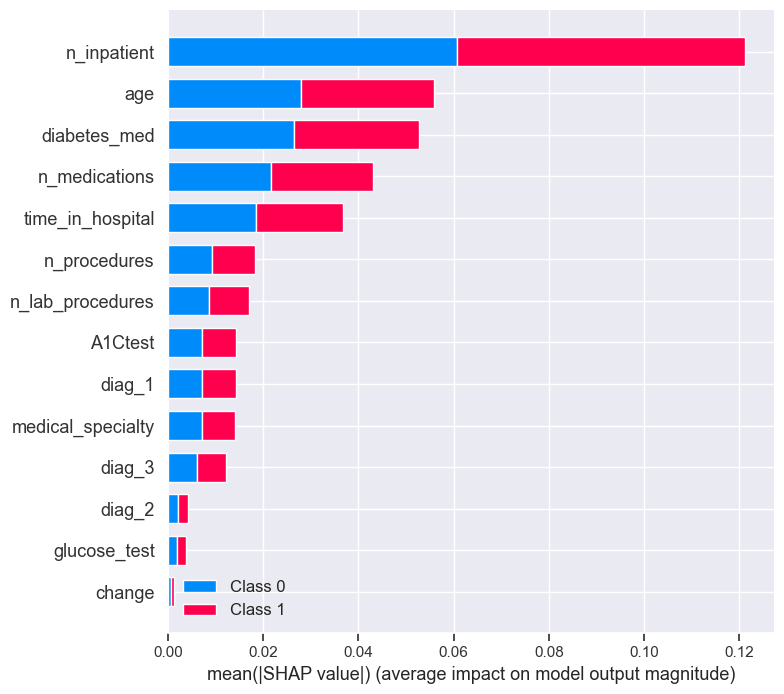

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

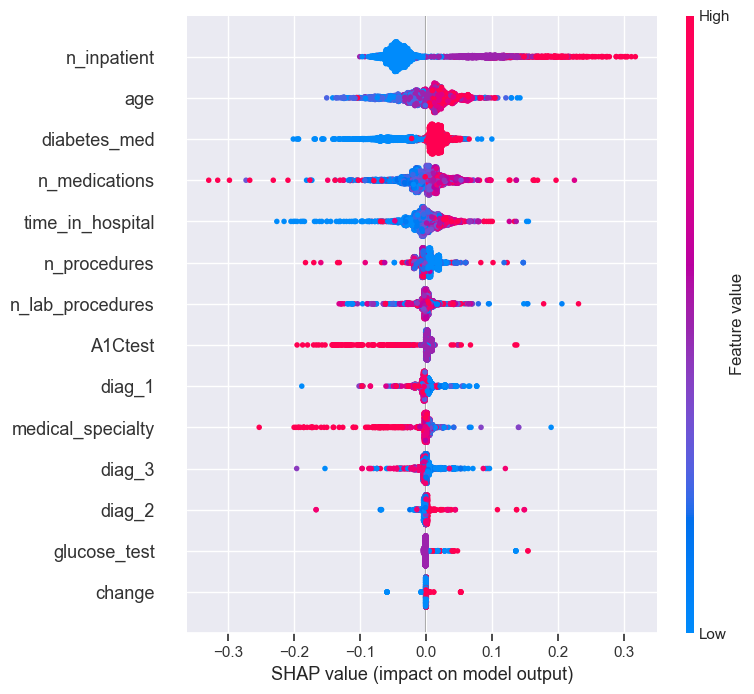

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.5660805445263755')

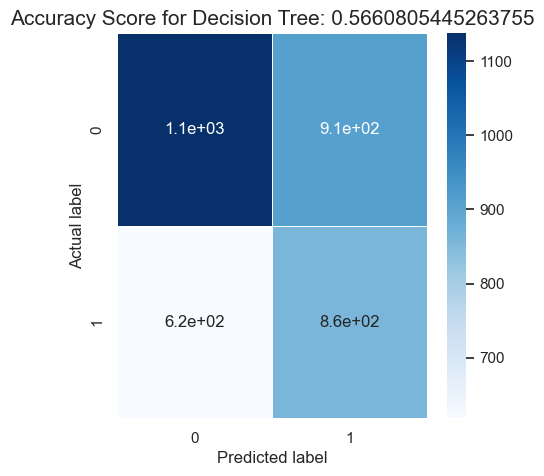

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

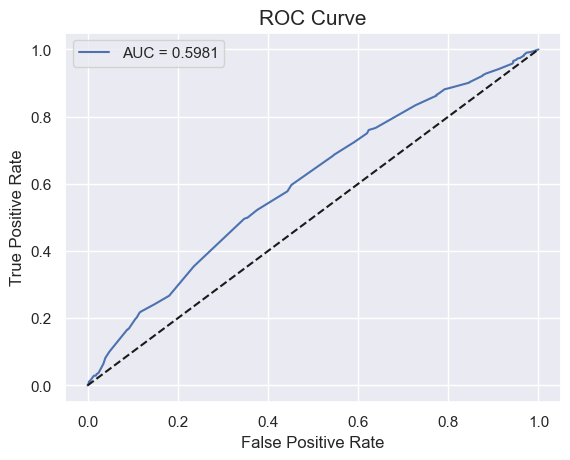

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 60.52 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.605218377765173
Precision Score :  0.605218377765173
Recall Score :  0.605218377765173
Jaccard Score :  0.43391622610817404
Log Loss :  13.635363976828708


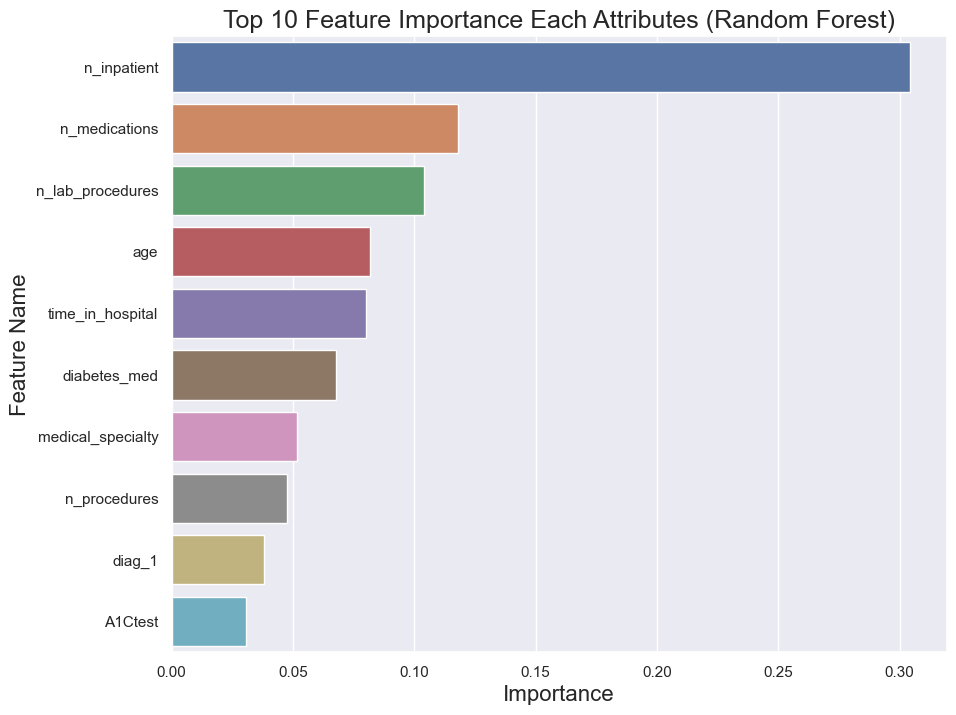

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.605218377765173')

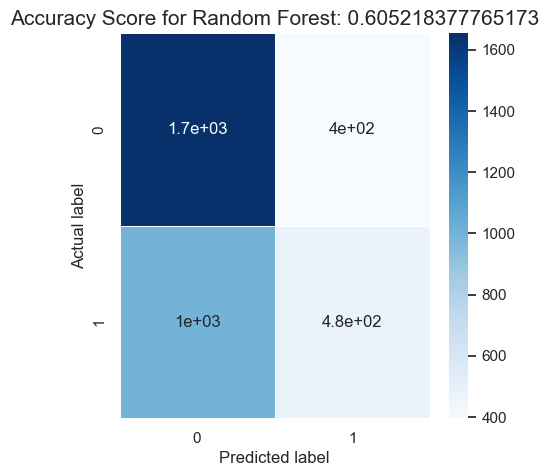

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

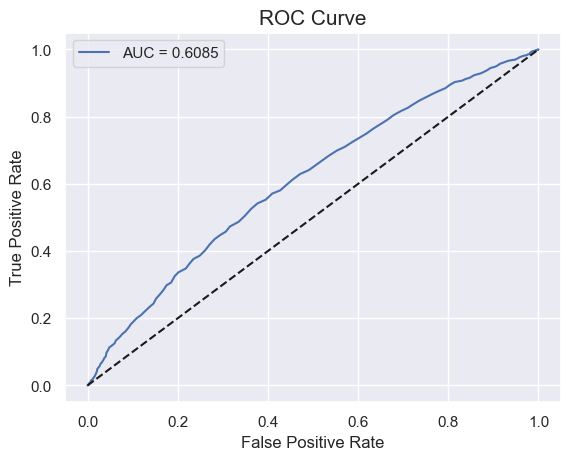

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
lr = LogisticRegression(class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2'}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 59.9 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.5989790130459444
Precision Score :  0.5989790130459444
Recall Score :  0.5989790130459444
Jaccard Score :  0.42753036437246966
Log Loss :  13.850926135190566


Text(0.5, 1.0, 'Feature Importance Each Attributes (Logistic Regression)')

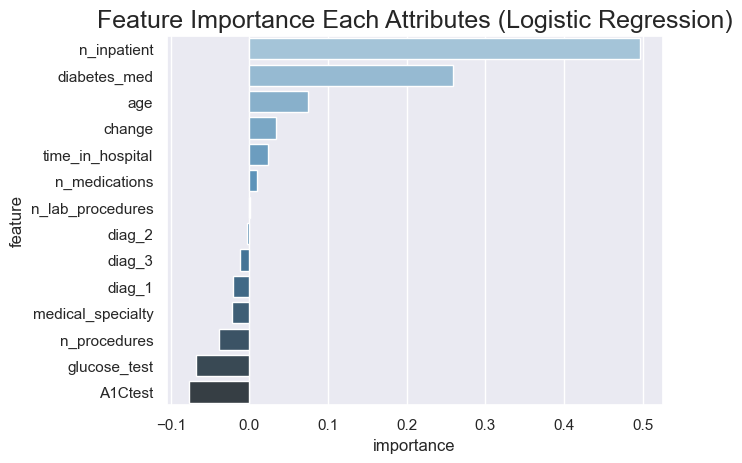

In [ ]:
# extract feature importance scores
importance_scores = lr.coef_[0]

# create a DataFrame of feature importance scores
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance_scores})

# sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# create a bar chart of feature importance
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='Blues_d')

plt.title('Feature Importance Each Attributes (Logistic Regression)', fontsize=18)

Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.5989790130459444')

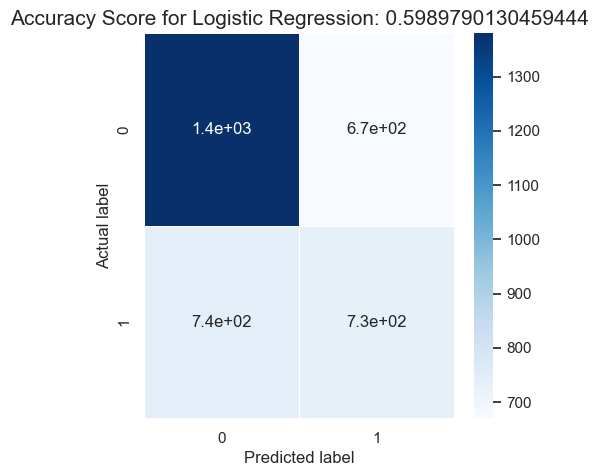

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

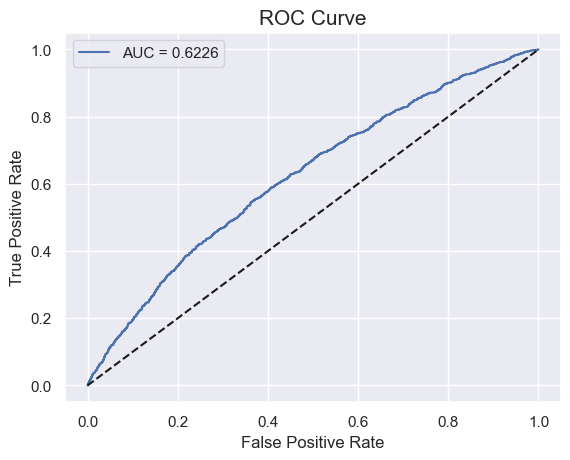

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# The accuracy from all of three algorithms still very bad. The best one is Random Forest Classifier with 60% accuracy